# Business Problem

A logistics company recorded the time taken for delivery and the time taken for the sorting of the items for delivery. Build a Simple Linear Regression model to find the relationship between delivery time and sorting time with delivery time as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models.

# Business Objective
The objective is to predict delivery time based on sorting time using a Simple Linear Regression model. This helps in optimizing logistics operations, improving efficiency, and identifying potential delays in delivery.

# Business Constraints
1. Accuracy vs. Interpretability: The model should be simple and interpretable while maintaining reasonable accuracy.
2. Data Availability: Limited data on sorting and delivery times may impact model performance.
3. Operational Constraints: Predictions must be fast and easily integrated into the logistics system.
4. Cost Sensitivity: The company aims to minimize delays without incurring excessive operational costs.

In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

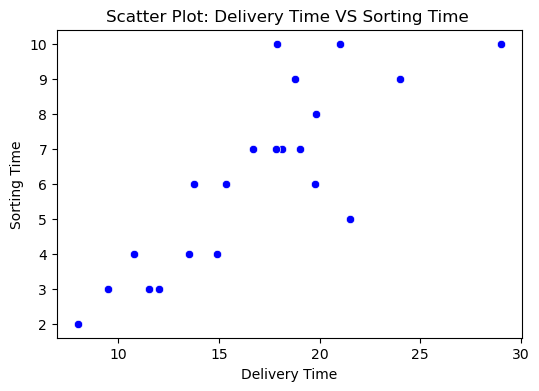

In [5]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=data['Delivery Time'],y=data['Sorting Time'],color='blue')
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.title("Scatter Plot: Delivery Time VS Sorting Time ")
plt.show()

In [6]:
#Scatter PLot shows the positive relationship between the Delivery Time and Sorting time 
#so we can say that Delivery time increases as the increase of sorting time

In [7]:
#Now let's calculate the correlation coefficient to analyse the result

In [8]:
#If the Value near to 1 and -1 it suggests the strong relationship if the value is 0 it shows the weak relationship


In [9]:
#correlation Coefficient
correlation=data['Delivery Time'].corr(data['Sorting Time'])
correlation

0.8259972607955326

In [10]:
#The value of correlation coefficient is near to 1 that means there is strong relationship between the Delivery time and Sorting Time

In [11]:
#Let's Build the Simple Linear Regression Model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
#Let's divide the data into dependent and independent variable
X=data[['Delivery Time']] #Independent Variable
Y=data['Sorting Time']  #Dependent Variable

In [14]:
#Splitting the data into train and split dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [15]:
#Creating and training the model
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [16]:
Y_pred=model.predict(X_test)
Y_pred

array([7.55049807, 6.46609809, 5.25412164, 4.73631127, 6.38730086])

In [17]:
#Lets'd calculate the Root Mean Squared Error
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
rmse

2.071312695998158

In [19]:
from sklearn.metrics import r2_score

In [20]:
r2_score(Y_test,Y_pred)

0.40411996047178356

In [21]:
data['Log_Sorting']=np.log(data['Sorting Time'])

In [23]:
X=data[['Delivery Time']]
Y_log=data['Log_Sorting']

In [24]:
X_train,X_test,Y_train_log,Y_test_log=train_test_split(X,Y_log,test_size=0.2,random_state=42)

In [25]:
log_model=LinearRegression()
log_model.fit(X_train,Y_train_log)

LinearRegression()

In [26]:
Y_pred_log=log_model.predict(X_test)
Y_pred_log

array([1.99436284, 1.78697847, 1.55519594, 1.45616811, 1.77190902])

In [27]:
Y_pred_original=np.exp(Y_pred_log)

In [31]:
rmse_log=np.sqrt(mean_squared_error(data['Sorting Time'].loc[Y_test_log.index],Y_pred_original))
rmse_log

2.2661227082619737

In [30]:
from sklearn.metrics import r2_score

In [35]:
r2_score(Y_test,Y_pred)

0.40411996047178356

In [61]:
#Trying AdaBoostClassifier...

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [16]:
ada_model=AdaBoostClassifier(n_estimators=100,learning_rate=1)

In [17]:
model=ada_model.fit(X_train,Y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [18]:
Y_pred=model.predict(X_test)
Y_pred

array([6, 6, 6, 6, 6], dtype=int64)

In [19]:
print("Accuracy ",metrics.accuracy_score(Y_test,Y_pred))

Accuracy  0.0


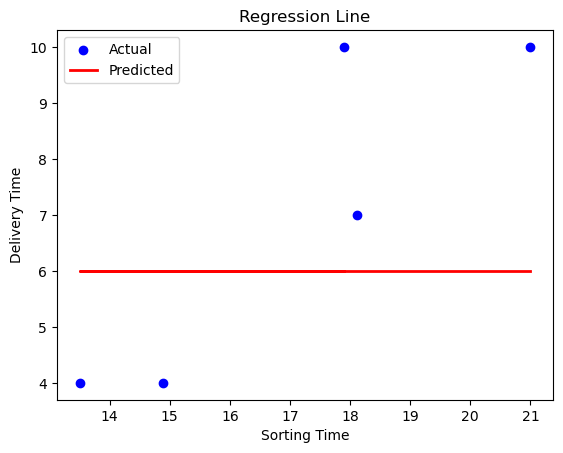

In [21]:
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Regression Line')
plt.legend()
plt.show()

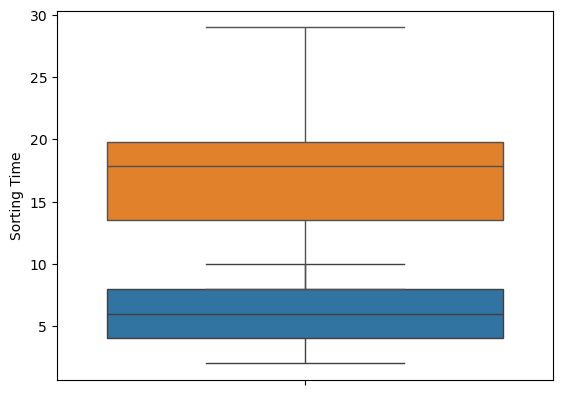

In [65]:
sns.boxplot(data['Sorting Time'])
sns.boxplot(data['Delivery Time'])
plt.show()

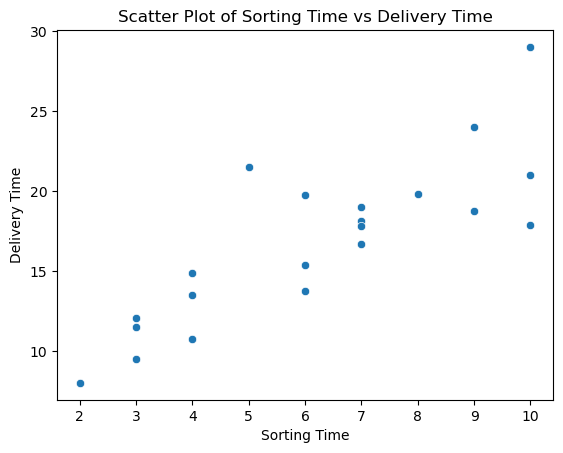

In [35]:
sns.scatterplot(x=data['Sorting Time'], y=data['Delivery Time'])
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Scatter Plot of Sorting Time vs Delivery Time')
plt.show()


In [38]:
data['Log_Sorting_Time'] = np.log(data['Sorting Time'])
data['Log_Delivery_Time'] = np.log(data['Delivery Time'])

In [40]:
X_log = data[['Log_Sorting_Time']]
y_log = data['Log_Delivery_Time']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

In [42]:
model_log = LinearRegression()
model_log.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred_log = model_log.predict(X_test)
y_pred_log

array([3.17069599, 2.9325148 , 2.55881334, 2.55881334, 3.17069599])

In [45]:
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))
r2_log = r2_score(y_test, y_pred_log)

In [46]:
print(f'RMSE (Log Model): {rmse_log:.4f}')
print(f'R-squared (Log Model): {r2_log:.4f}')

RMSE (Log Model): 0.1554
R-squared (Log Model): 0.0090


In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
poly = PolynomialFeatures(degree=2)  
X_poly = poly.fit_transform(data[['Sorting Time']])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [57]:
model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

LinearRegression()

In [58]:
y_pred_poly = model_poly.predict(X_test)

In [59]:
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

In [60]:
print(f'RMSE (Polynomial Model): {rmse_poly:.4f}')
print(f'R-squared (Polynomial Model): {r2_poly:.4f}')

RMSE (Polynomial Model): 4.1128
R-squared (Polynomial Model): -1.4334
